# Introduction to DanishGridInsight Project

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 📖 TABLE OF CONTENTS

- [Section 1]()
  - [Subsection 1]()
    - [Subsubsection 1]()
    - [Subsubsection 2]()
  - [Subsection 2]()
    - [Subsubsection 1]()
    - [Subsubsection 2]()
- [Section 2]()
  - [Subsection 1]()
    - [Subsubsection 1]()
    - [Subsubsection 2]()
  - [Subsection 2]()
    - [Subsubsection 1]()
    - [Subsubsection 2]()

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 1. Introduction

In the DanishGridInsight project, we will build a production-ready end-to-end batch ML system to forecast energy consumption levels for the next 24 hours across multiple consumer types from Denmark. We will go step-by-step through design, implementation, training, deployment, and monitoring of an ML system using MLOps good practices.

At the end of this project, we will know how to:

- design a **batch-serving architecture**

- use **Hopsworks** as a feature store

- design a **feature engineering pipeline** that reads data from an API

- build a **training pipeline with hyper-parameter tuning**

- use **Weights & Biases** as an ML Platform to track your experiments, models, and metadata

- implement a **batch prediction pipeline**

- use **Poetry** to build your own Python packages

- deploy your own **private PyPi server**

- orchestrate everything with **Airflow**

- use the predictions to code a web app using **FastAPI** and **Taipy**

- use **Docker** to containerize your code

- use **Great Expectations** to ensure data validation and integrity

- **monitor** the performance of the predictions over time

- deploy everything to **GCP** and **Hugging Face**

- build a **CI/CD pipeline using GitHub Actions**

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 2. Batch Architecture

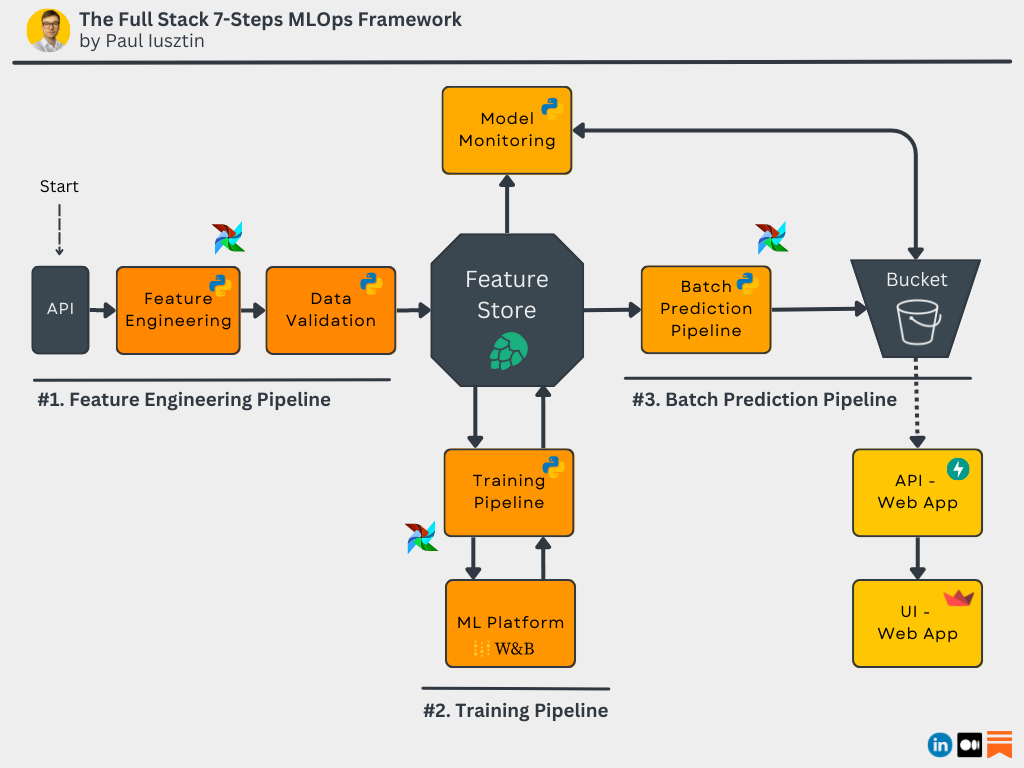

In [1]:
# Batch Architecture

from IPython import display
display.Image("data/images/MLOps_Project_01_DanishGridInsight-01.png")

## Overview

Any batch architecture consists of 3 main components:

- **Feature Engineering Pipeline:** ingests data from one or multiple data sources and transforms it into valuable features for the model

- **Training Pipeline:** takes the features as input and trains and evaluates the model on them. At this step, before finding the best model & hyperparameters, we experiment with multiple configurations. After this, we can automate the training process by leveraging the best configuration we found during the experimentation step. The output of this step is a model artifact.

- **Batch Prediction Pipeline:** Takes as input the features and model artifacts and runs the model on batches (big chunks) of data. Usually, the **inference is not real-time**, as it takes a while to run. Afterward, it saves the predictions into storage, from where various apps can consume the predictions in real-time.

The pipelines are wrapped up in a DAG and scheduled to run every week, day, hour, etc. (what makes sense for our use case).

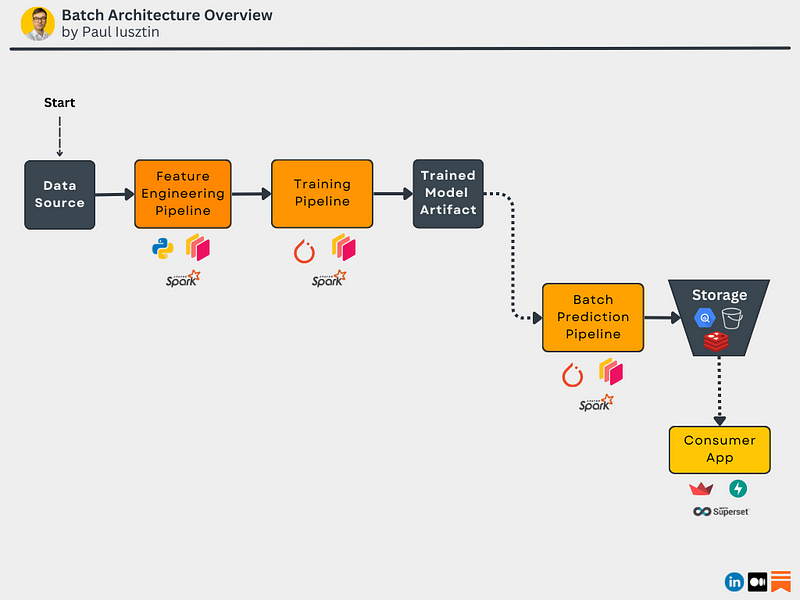

In [2]:
# Batch Architecture Overview

from IPython import display
display.Image("data/images/MLOps_Project_01_DanishGridInsight-02.png")

## Variations of the Batch Architecture

Some common variations of the batch architecture are:

- **Online Training:** Every time new data is ingested, we train the model using the best configuration we found during our experimentation.

- **Offline Training:** We train our model once on our static dataset and use the trained model to make predictions on new data.

What we will choose depends a lot on our context and resources. Remember that training a model is an expensive operation.

In this project, we use real-time energy consumption levels, which are modeled as time series. Thus, our strategy was based on the online training paradigm.

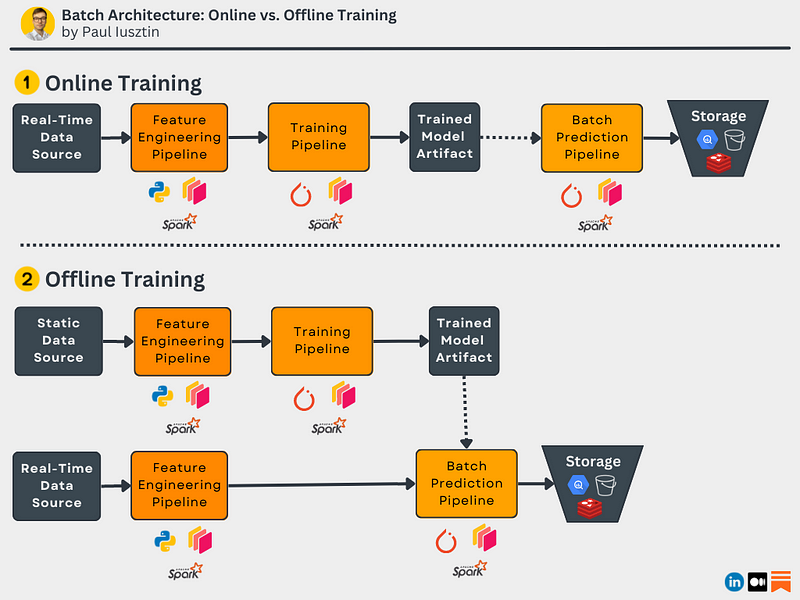

In [3]:
# Batch Architecture Variations: Online Vs Offline Training

from IPython import display
display.Image("data/images/MLOps_Project_01_DanishGridInsight-03.png")

## Why Use a Batch Serving Architecture?

There are 4 main types of deploying a model:

- Batch serving
- Request-response
- Streaming
- Embedded

Batch serving is the perfect starting point for getting hands-on experience with building a real-world ML system because most AI applications start using batch architecture and move towards request-response or streaming. Often, our initial deployment will be in batch mode. **Why?**

**Upsides:**

- You don't have to focus on latency & throughput.

- You can focus on building a working solution that adds value.

- It is the fastest and easiest way to serve real-time predictions. Thus providing an excellent experience to the end user.

- You can serve the predictions without hosting a powerful machine running the model 24/7.

**Downsides:**

- The predictions are lagged as you consume them from storage (cache).

- Most probably, you will generate redundant and unused predictions that cost you money to make.

That is why many solutions start using a batch architecture and slowly move to a request-response or streaming solution.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)